In [59]:
# Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing Libraries
from scipy.stats import chi2_contingency #---> For Chi-Squared Test 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #--> For Categorical Encoding
from sklearn.preprocessing import StandardScaler,MinMaxScaler #--> For Feature Scaling
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 

# Model Selection Libraries
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



1. Load Data from CSV file

In [60]:
nutri_df = pd.read_csv(r'E:\vs_code\MINI_PROJECT_GUVI\Nutriclass_Food_Classification\synthetic_food_dataset_imbalanced.csv')
nutri_df.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


2. Inspection of Data

In [61]:
nutri_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [62]:
nutri_df.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


2.1 Checking and dropping NULL Values and Duplicated values

In [63]:
nutri_df.isnull().sum()

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64

In [64]:
nutri_df.dropna(inplace=True)
nutri_df.isnull().sum()

Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64

In [65]:
nutri_df.duplicated().sum()

np.int64(65)

In [66]:
nutri_df.drop_duplicates(inplace=True)
nutri_df.duplicated().sum()

np.int64(0)

In [67]:
nutri_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31260 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31260 non-null  float64
 1   Protein             31260 non-null  float64
 2   Fat                 31260 non-null  float64
 3   Carbs               31260 non-null  float64
 4   Sugar               31260 non-null  float64
 5   Fiber               31260 non-null  float64
 6   Sodium              31260 non-null  float64
 7   Cholesterol         31260 non-null  float64
 8   Glycemic_Index      31260 non-null  float64
 9   Water_Content       31260 non-null  float64
 10  Serving_Size        31260 non-null  float64
 11  Meal_Type           31260 non-null  object 
 12  Preparation_Method  31260 non-null  object 
 13  Is_Vegan            31260 non-null  bool   
 14  Is_Gluten_Free      31260 non-null  bool   
 15  Food_Name           31260 non-null  object 
dtypes: bool(2

2.2 Standardizing columns and values.

In [68]:
nutri_df.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

In [69]:
nutri_df.columns = nutri_df.columns.str.strip().str.lower()
nutri_df.columns

Index(['calories', 'protein', 'fat', 'carbs', 'sugar', 'fiber', 'sodium',
       'cholesterol', 'glycemic_index', 'water_content', 'serving_size',
       'meal_type', 'preparation_method', 'is_vegan', 'is_gluten_free',
       'food_name'],
      dtype='object')

In [70]:
nutri_df.sample(10)

,calories,protein,fat,carbs,sugar,fiber,sodium,cholesterol,glycemic_index,water_content,serving_size,meal_type,preparation_method,is_vegan,is_gluten_free,food_name
29876,221.045082,10.506865,11.897274,30.931782,4.881968,3.073330,321.443606,19.429897,66.866612,50.947883,143.626590,dinner,grilled,False,True,Sushi
30164,177.719242,10.995314,8.390951,31.893077,4.501928,0.874552,344.686219,18.562786,71.657163,48.157672,147.650653,dinner,raw,False,True,Sushi
3802,333.669521,6.018535,11.460140,37.697790,2.157135,1.834696,14.016856,8.659937,65.304455,44.634418,147.241971,lunch,fried,False,False,Pasta
22021,185.821924,11.143932,6.763420,34.037560,5.049788,1.872744,341.587975,21.713856,65.688190,49.986537,147.299919,dinner,baked,False,True,Sushi
9358,99.397054,0.125630,0.207821,23.194101,20.525709,1.846108,2.181093,0.000000,43.256074,89.040629,166.981203,snack,baked,True,True,Apple
29203,198.161689,11.082444,5.286115,25.146104,3.945885,2.474084,262.464032,13.167366,79.151884,53.135728,155.810751,snack,baked,False,True,Sushi
9084,402.239740,15.758220,22.325819,35.385857,5.605705,2.708855,772.297183,29.456422,70.608580,41.043302,183.015613,dinner,fried,False,False,Burger
13680,225.046605,3.241509,9.927465,18.940132,20.339358,0.230121,75.346618,36.201599,64.941999,53.634632,110.923584,breakfast,raw,False,True,Ice Cream
788,98.889420,0.564864,0.218758,25.152463,18.355515,3.659852,2.316959,0.000000,33.976058,87.513625,144.683894,dinner,raw,True,True,Apple
10062,314.602797,13.796076,19.049948,37.087994,3.697456,1.912629,611.250916,24.939393,79.417003,39.253138,204.909285,lunch,raw,False,False,Pizza


In [71]:
nutri_df[nutri_df.select_dtypes(include= 'float64').columns] = nutri_df.select_dtypes(include= 'float64').round(3)
nutri_df.head()

,calories,protein,fat,carbs,sugar,fiber,sodium,cholesterol,glycemic_index,water_content,serving_size,meal_type,preparation_method,is_vegan,is_gluten_free,food_name
0,290.464,14.340,14.153,35.267,4.828,1.291,647.553,24.990,81.576,45.669,197.570,dinner,fried,False,False,Pizza
1,212.627,4.081,11.622,23.219,16.348,0.130,68.572,34.302,69.522,49.854,103.834,snack,raw,False,True,Ice Cream
2,330.695,14.327,19.748,29.479,6.251,0.794,663.172,34.817,62.552,40.133,198.989,snack,raw,False,False,Burger
3,198.071,9.452,5.476,32.098,2.985,1.710,300.750,28.511,68.689,57.423,135.714,lunch,fried,False,True,Sushi
4,274.496,6.100,16.256,29.757,17.353,1.466,296.315,15.403,70.385,33.170,73.019,snack,baked,False,False,Donut


In [72]:
nutri_df['food_name'] = nutri_df['food_name'].str.replace(' ','_').str.lower()
nutri_df['preparation_method'] = nutri_df['preparation_method'].str.lower()
nutri_df['meal_type'] = nutri_df['meal_type'].str.lower()
nutri_df.head()

,calories,protein,fat,carbs,sugar,fiber,sodium,cholesterol,glycemic_index,water_content,serving_size,meal_type,preparation_method,is_vegan,is_gluten_free,food_name
0,290.464,14.340,14.153,35.267,4.828,1.291,647.553,24.990,81.576,45.669,197.570,dinner,fried,False,False,pizza
1,212.627,4.081,11.622,23.219,16.348,0.130,68.572,34.302,69.522,49.854,103.834,snack,raw,False,True,ice_cream
2,330.695,14.327,19.748,29.479,6.251,0.794,663.172,34.817,62.552,40.133,198.989,snack,raw,False,False,burger
3,198.071,9.452,5.476,32.098,2.985,1.710,300.750,28.511,68.689,57.423,135.714,lunch,fried,False,True,sushi
4,274.496,6.100,16.256,29.757,17.353,1.466,296.315,15.403,70.385,33.170,73.019,snack,baked,False,False,donut


3. Checking Outliers

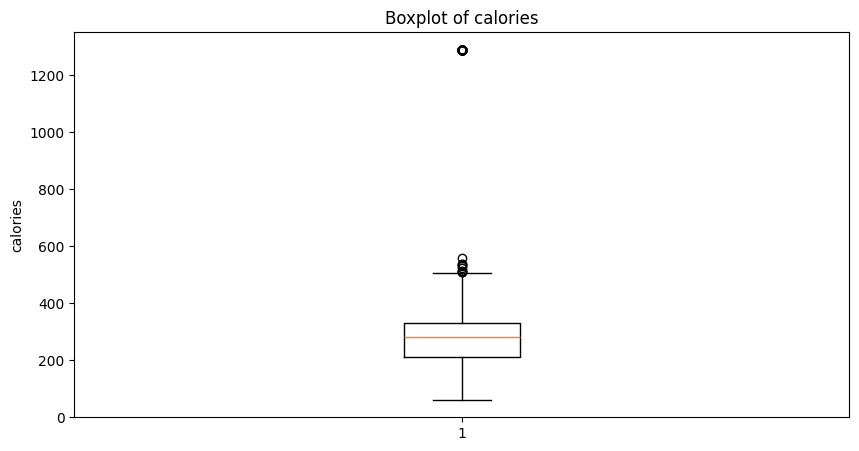

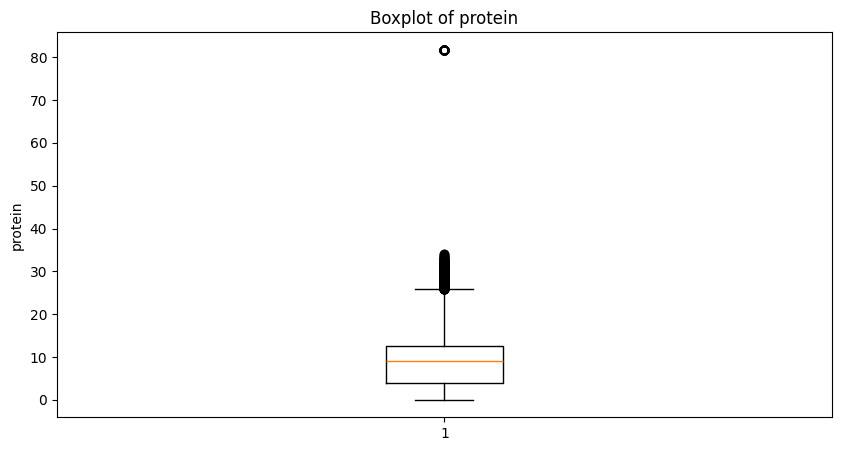

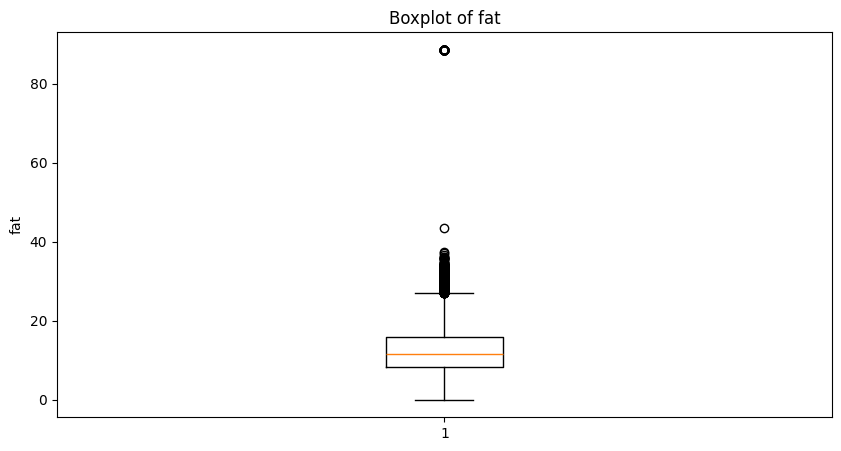

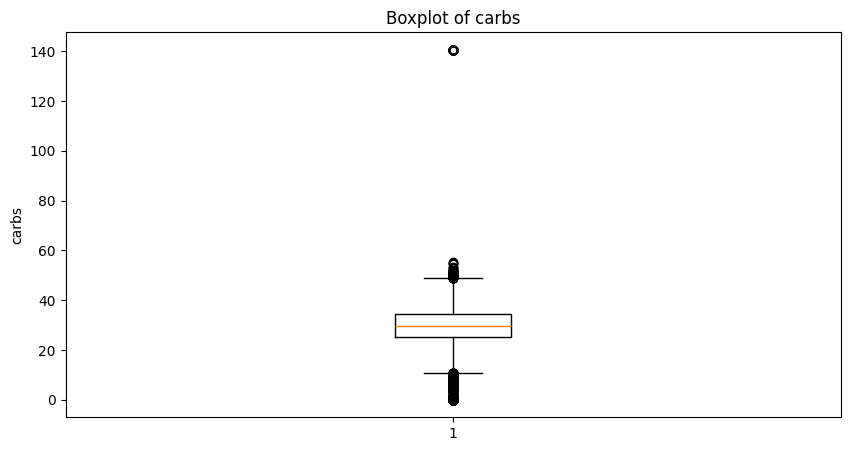

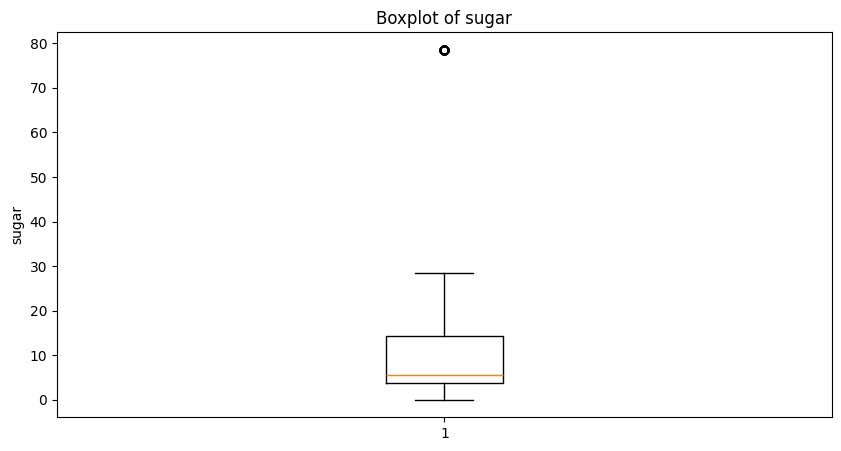

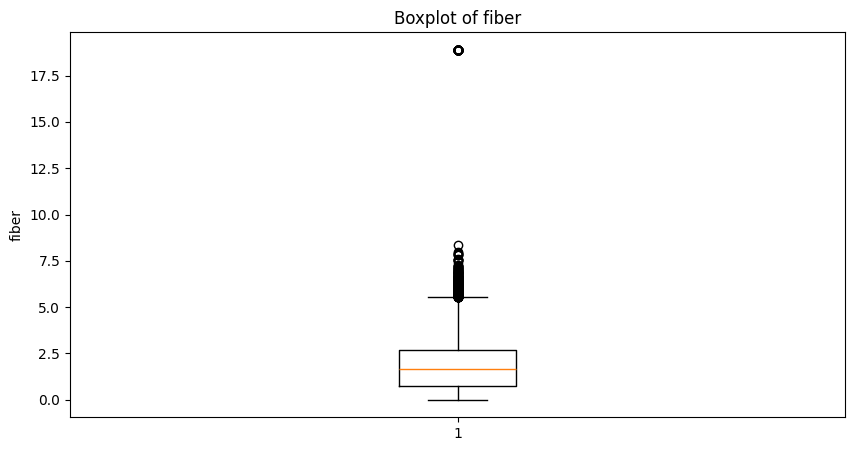

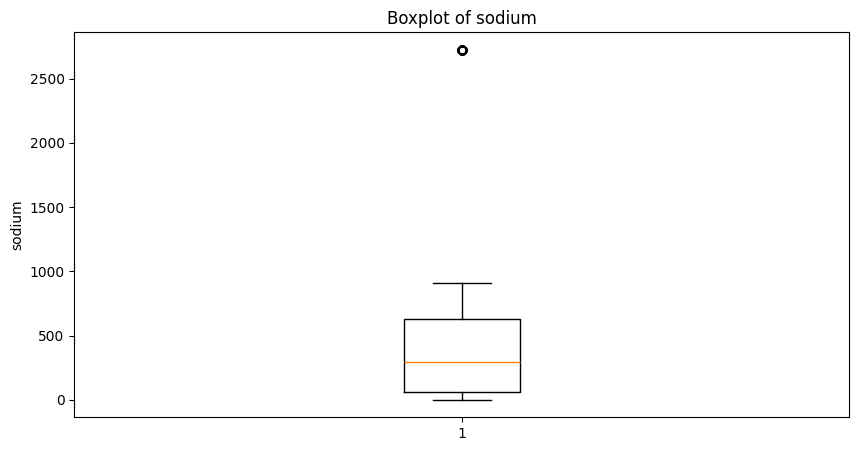

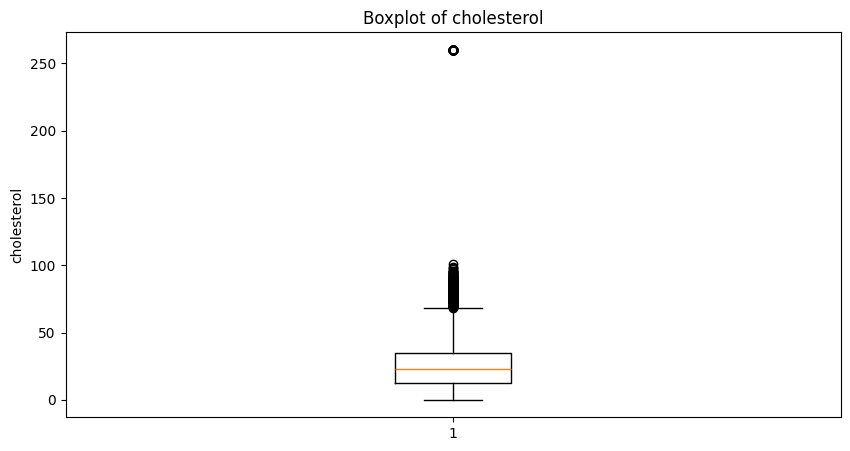

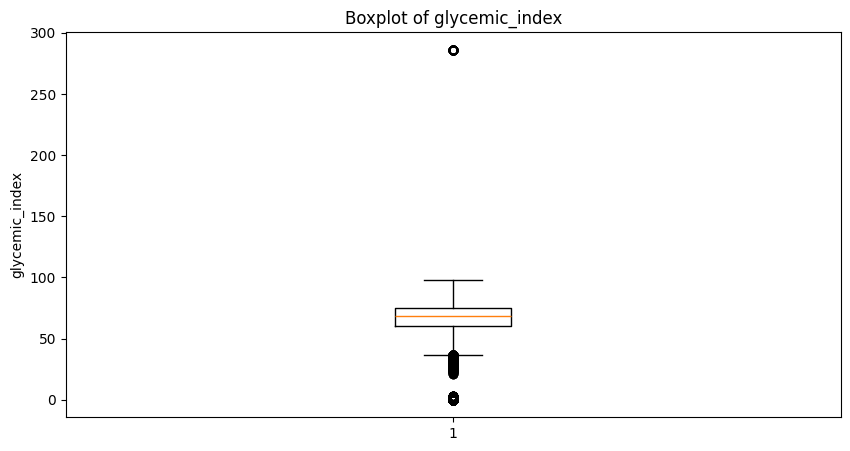

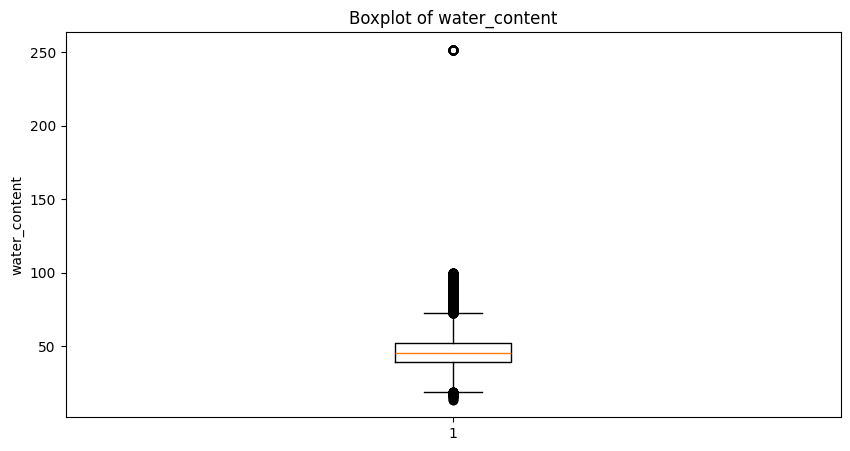

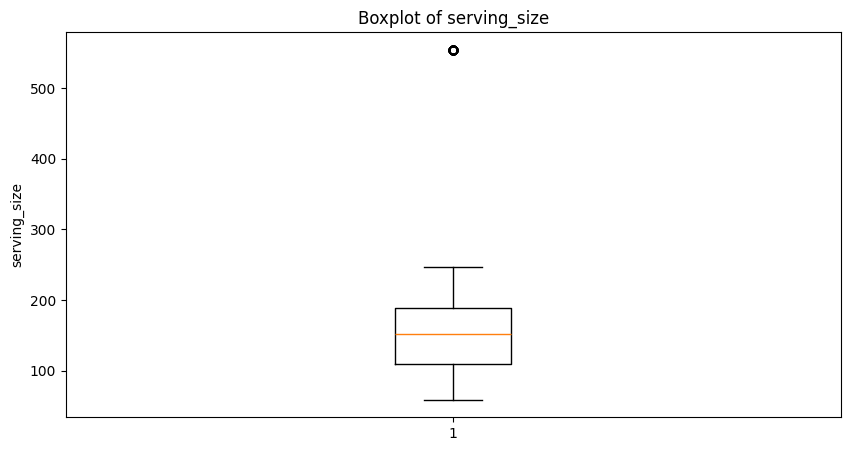

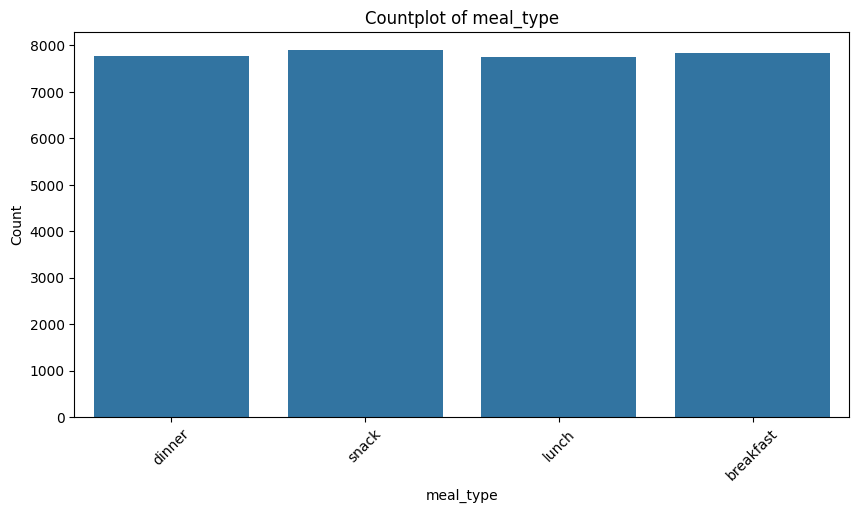

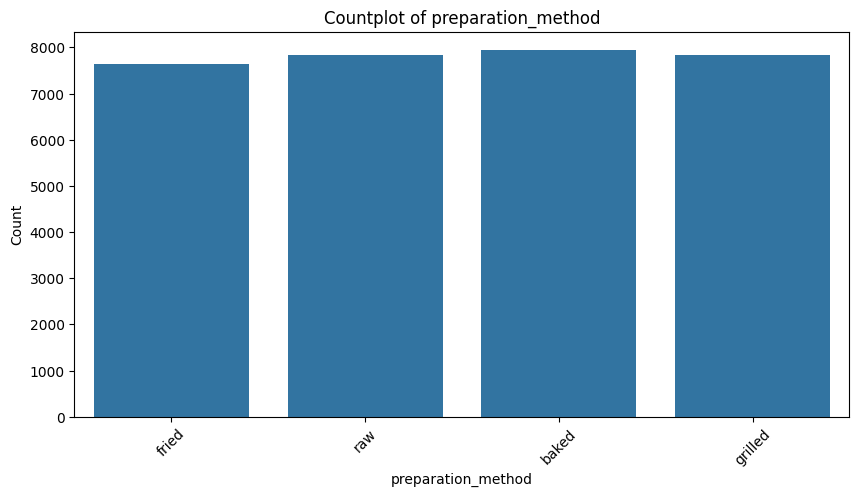

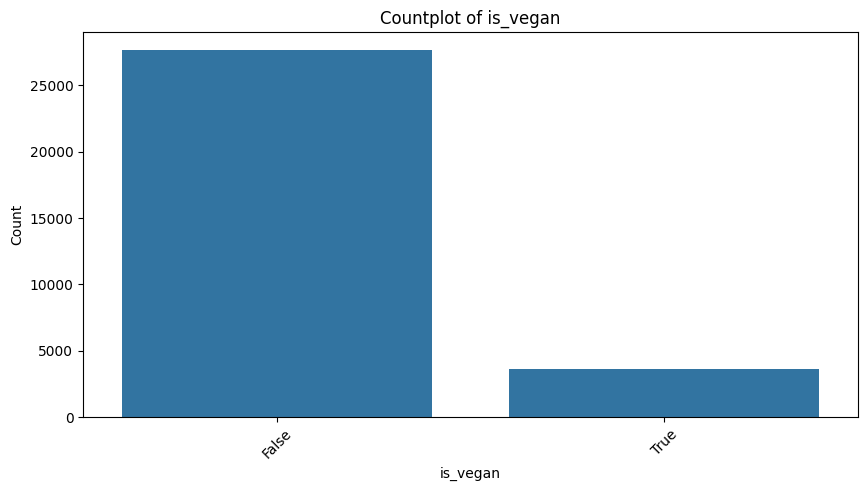

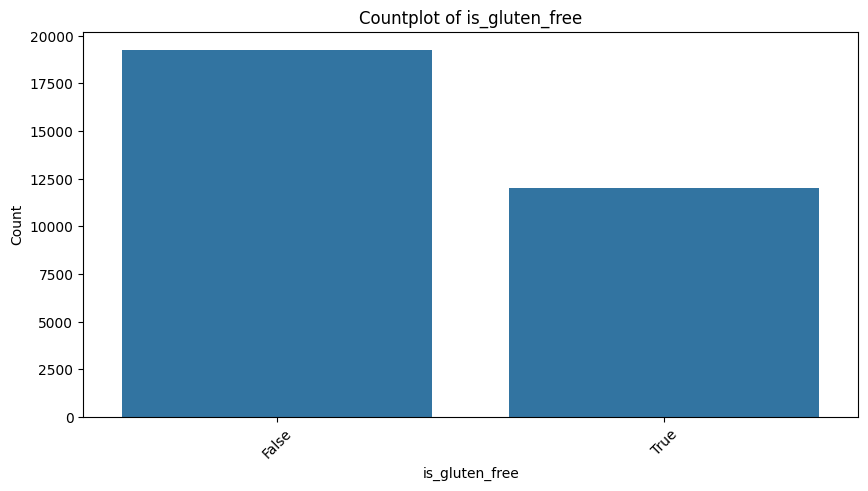

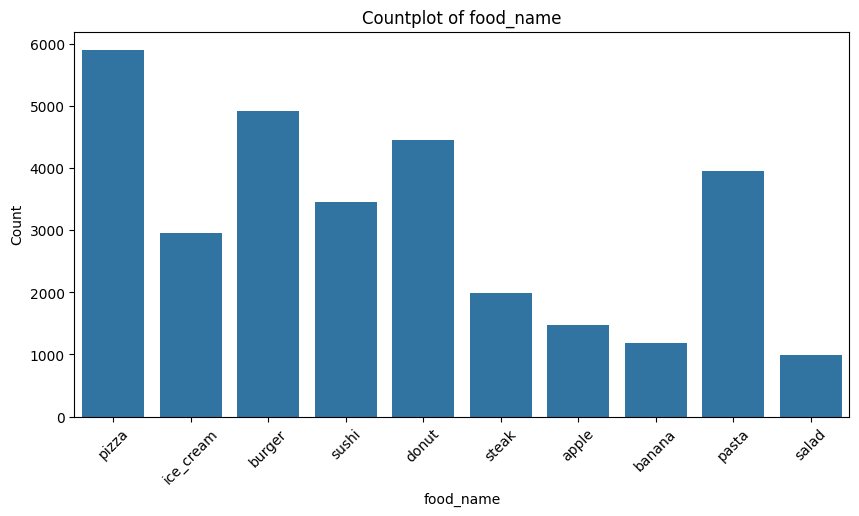

In [73]:
def num_outlier_check(col):
    plt.figure(figsize=(10,5))
    plt.boxplot(nutri_df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

def cat_distribution_check(col):
    plt.figure(figsize=(10,5))
    sns.countplot(data=nutri_df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

for col in nutri_df.columns:
    if nutri_df[col].dtype in ['int64','float64']:
        num_outlier_check(col)
    else:
        cat_distribution_check(col)

3.1 Dropping Outliers

In [74]:
nutri_df[nutri_df['calories'] > 1000]

,calories,protein,fat,carbs,sugar,fiber,sodium,cholesterol,glycemic_index,water_content,serving_size,meal_type,preparation_method,is_vegan,is_gluten_free,food_name
155,1289.957,81.762,88.62,140.586,78.548,18.892,2724.237,260.149,286.126,251.837,554.72,snack,fried,False,False,burger
182,1289.957,81.762,88.62,140.586,78.548,18.892,2724.237,260.149,286.126,251.837,554.72,lunch,baked,False,False,pizza
229,1289.957,81.762,88.62,140.586,78.548,18.892,2724.237,260.149,286.126,251.837,554.72,dinner,raw,False,False,donut
626,1289.957,81.762,88.62,140.586,78.548,18.892,2724.237,260.149,286.126,251.837,554.72,dinner,grilled,False,False,pizza
1405,1289.957,81.762,88.62,140.586,78.548,18.892,2724.237,260.149,286.126,251.837,554.72,lunch,raw,True,True,banana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29047,1289.957,81.762,88.62,140.586,78.548,18.892,2724.237,260.149,286.126,251.837,554.72,lunch,baked,False,False,donut
29049,1289.957,81.762,88.62,140.586,78.548,18.892,2724.237,260.149,286.126,251.837,554.72,breakfast,raw,False,False,pasta
29637,1289.957,81.762,88.62,140.586,78.548,18.892,2724.237,260.149,286.126,251.837,554.72,lunch,baked,True,True,apple
29968,1289.957,81.762,88.62,140.586,78.548,18.892,2724.237,260.149,286.126,251.837,554.72,snack,fried,True,True,apple


In [75]:
nutri_df = nutri_df.drop(nutri_df[nutri_df['calories'] > 1000].index)
nutri_df.describe()

,calories,protein,fat,carbs,sugar,fiber,sodium,cholesterol,glycemic_index,water_content,serving_size
count,31176.000000,31176.000000,31176.000000,31176.000000,31176.000000,31176.000000,31176.000000,31176.000000,31176.000000,31176.000000,31176.000000
mean,268.519889,9.178554,12.112937,28.409624,8.209240,1.822853,323.970542,25.750228,63.152918,48.007054,148.801154
std,86.713381,6.295685,6.594810,10.070219,6.371508,1.340147,273.650986,19.101939,20.279393,15.314175,43.725780
min,60.786000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465000,58.576000
25%,210.068750,3.845750,8.218500,25.075000,3.732000,0.737000,62.743750,12.636500,59.928250,38.943000,109.203500
50%,281.289000,9.049000,11.544000,29.644000,5.482500,1.638000,291.736500,23.205000,68.398000,45.549000,151.433500
75%,329.123500,12.636000,15.741000,34.551000,14.298250,2.652000,629.587000,34.913500,75.341500,52.282500,188.713750
max,557.532000,34.117000,43.445000,55.265000,28.481000,8.361000,905.629000,100.766000,98.285000,100.000000,246.789000


In [76]:
nutri_df.shape

(31176, 16)

3.1 Seperating Features and Target columns

In [77]:
nutri_df.sample(10)

,calories,protein,fat,carbs,sugar,fiber,sodium,cholesterol,glycemic_index,water_content,serving_size,meal_type,preparation_method,is_vegan,is_gluten_free,food_name
23176,203.200,4.746,13.378,40.058,15.423,0.866,290.301,13.371,68.665,33.683,80.907,dinner,baked,False,False,donut
26118,388.520,15.409,24.327,35.282,6.007,0.543,719.162,52.880,80.849,46.192,175.653,dinner,baked,False,False,burger
8622,328.373,13.299,7.625,34.311,5.426,0.603,673.071,33.436,75.077,45.486,177.910,breakfast,raw,False,False,pizza
24838,247.974,3.184,11.091,37.402,15.597,0.850,270.487,29.914,70.334,34.777,78.861,dinner,baked,False,False,donut
1478,169.683,8.910,8.744,31.634,1.803,2.795,301.611,21.133,65.942,40.489,137.579,breakfast,grilled,False,True,sushi
30300,193.981,3.202,9.415,22.527,15.460,0.393,74.039,42.314,51.608,49.597,91.841,snack,raw,False,True,ice_cream
10184,287.264,3.683,12.259,37.967,16.244,1.051,271.495,12.646,71.154,32.580,85.183,dinner,grilled,False,False,donut
4920,341.394,6.553,11.721,30.586,2.508,2.580,25.630,11.217,64.134,43.545,163.562,dinner,baked,False,False,pasta
16931,305.249,6.702,10.570,37.568,2.917,1.792,17.312,11.644,64.745,40.297,144.525,dinner,raw,False,False,pasta
23916,196.113,1.836,13.571,22.727,18.606,0.310,63.819,35.804,59.677,60.225,113.838,dinner,fried,False,True,ice_cream


In [78]:
X = nutri_df.drop('food_name',axis=1)
Y = nutri_df['food_name']

X.head()

,calories,protein,fat,carbs,sugar,fiber,sodium,cholesterol,glycemic_index,water_content,serving_size,meal_type,preparation_method,is_vegan,is_gluten_free
0,290.464,14.340,14.153,35.267,4.828,1.291,647.553,24.990,81.576,45.669,197.570,dinner,fried,False,False
1,212.627,4.081,11.622,23.219,16.348,0.130,68.572,34.302,69.522,49.854,103.834,snack,raw,False,True
2,330.695,14.327,19.748,29.479,6.251,0.794,663.172,34.817,62.552,40.133,198.989,snack,raw,False,False
3,198.071,9.452,5.476,32.098,2.985,1.710,300.750,28.511,68.689,57.423,135.714,lunch,fried,False,True
4,274.496,6.100,16.256,29.757,17.353,1.466,296.315,15.403,70.385,33.170,73.019,snack,baked,False,False


In [79]:
Y.sample(10)

17108     pizza
10011     pizza
6887      steak
25157     salad
10801     pizza
13059    banana
18217     pasta
474       pasta
9979      salad
11108    burger
Name: food_name, dtype: object

In [80]:
cat_columns = X.select_dtypes(include=['object', 'bool'])
cat_columns.head()

,meal_type,preparation_method,is_vegan,is_gluten_free
0,dinner,fried,False,False
1,snack,raw,False,True
2,snack,raw,False,False
3,lunch,fried,False,True
4,snack,baked,False,False


In [81]:
Num_columns = X.select_dtypes(include=['int64','float64'])
Num_columns.head()

,calories,protein,fat,carbs,sugar,fiber,sodium,cholesterol,glycemic_index,water_content,serving_size
0,290.464,14.340,14.153,35.267,4.828,1.291,647.553,24.990,81.576,45.669,197.570
1,212.627,4.081,11.622,23.219,16.348,0.130,68.572,34.302,69.522,49.854,103.834
2,330.695,14.327,19.748,29.479,6.251,0.794,663.172,34.817,62.552,40.133,198.989
3,198.071,9.452,5.476,32.098,2.985,1.710,300.750,28.511,68.689,57.423,135.714
4,274.496,6.100,16.256,29.757,17.353,1.466,296.315,15.403,70.385,33.170,73.019


3.2 Checking Relation between Feature and Target using chi2 test

meal_type :
food_name  apple  banana  burger  donut  ice_cream  pasta  pizza  salad  \
meal_type                                                                 
breakfast    344     305    1220   1156        719    976   1487    266   
dinner       355     286    1257   1070        752    996   1496    232   
lunch        372     303    1205   1158        738    953   1376    253   
snack        392     285    1229   1060        733   1027   1528    231   

food_name  steak  sushi  
meal_type                
breakfast    473    873  
dinner       469    837  
lunch        520    858  
snack        513    873  
p value is :0.17847334414277088
No Difference (Accept H0)


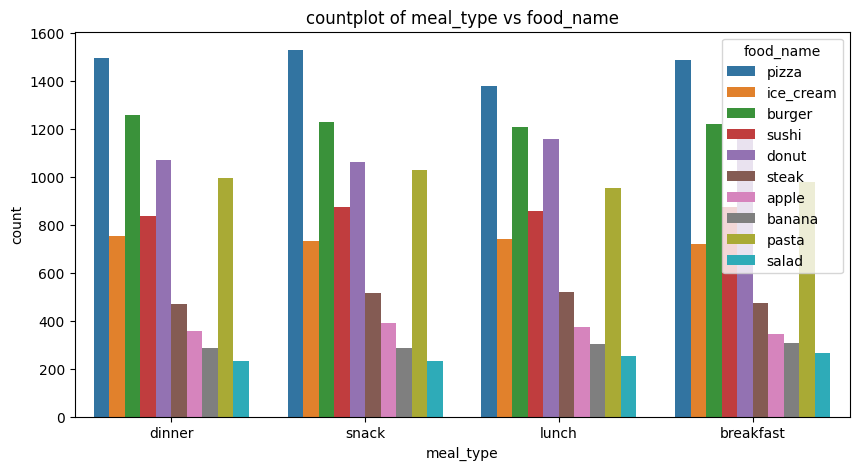

<Figure size 1000x500 with 0 Axes>

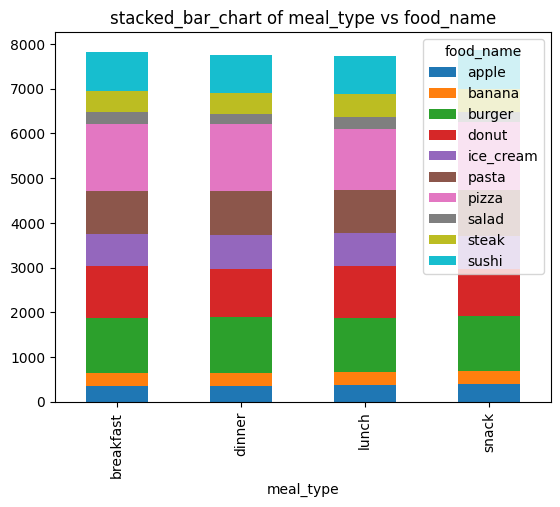

********************
preparation_method :
food_name           apple  banana  burger  donut  ice_cream  pasta  pizza  \
preparation_method                                                          
baked                 377     302    1283   1125        768   1000   1444   
fried                 354     302    1165   1075        711    964   1474   
grilled               404     269    1215   1100        715    996   1542   
raw                   328     306    1248   1144        748    992   1427   

food_name           salad  steak  sushi  
preparation_method                       
baked                 252    479    891  
fried                 242    515    826  
grilled               236    494    844  
raw                   252    487    880  
p value is :0.3585995028721802
No Difference (Accept H0)


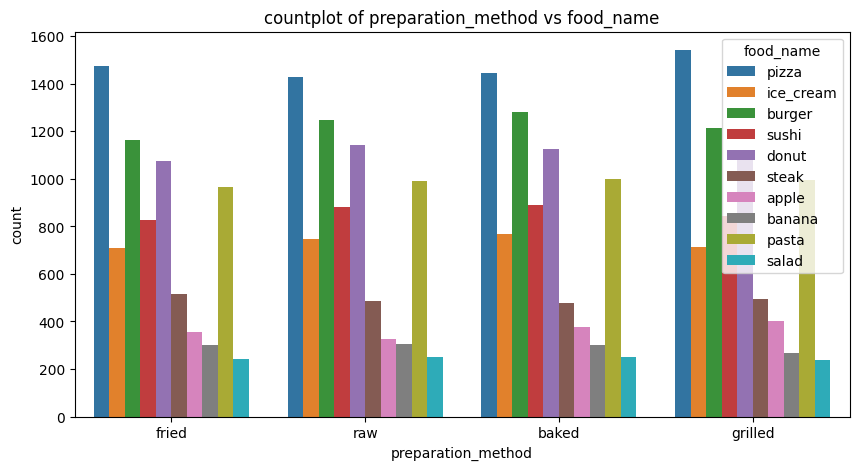

<Figure size 1000x500 with 0 Axes>

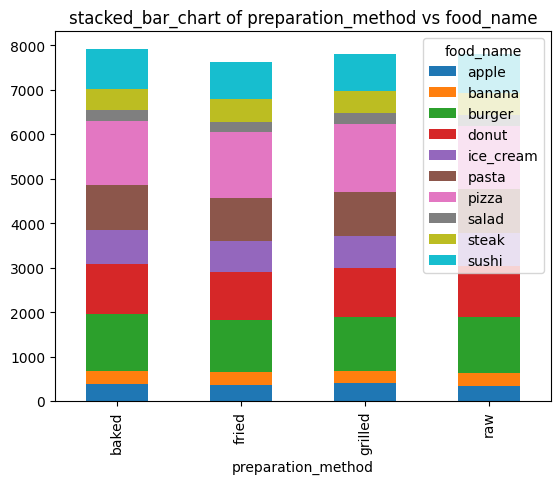

********************
is_vegan :
food_name  apple  banana  burger  donut  ice_cream  pasta  pizza  salad  \
is_vegan                                                                  
False          0       0    4911   4444       2942   3952   5887      0   
True        1463    1179       0      0          0      0      0    982   

food_name  steak  sushi  
is_vegan                 
False       1975   3441  
True           0      0  
p value is :0.0
Significant Difference (Reject H0)


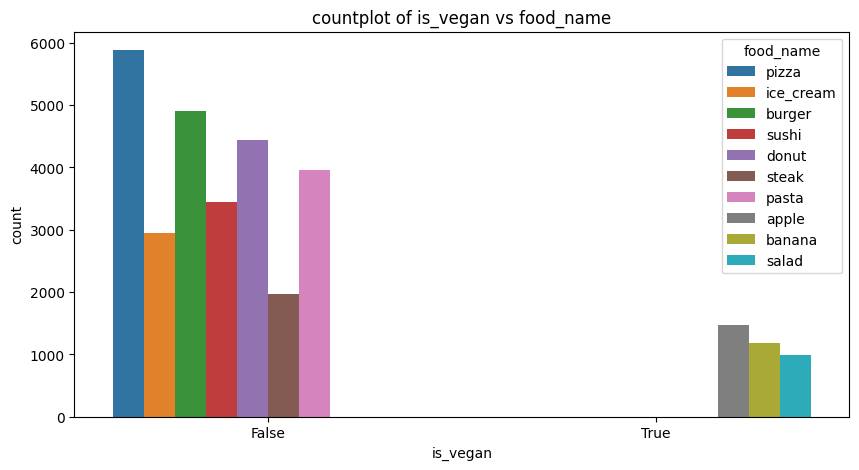

<Figure size 1000x500 with 0 Axes>

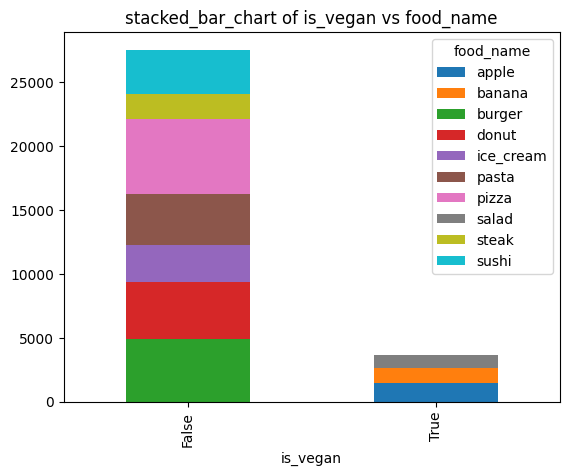

********************
is_gluten_free :
food_name       apple  banana  burger  donut  ice_cream  pasta  pizza  salad  \
is_gluten_free                                                                 
False               0       0    4911   4444          0   3952   5887      0   
True             1463    1179       0      0       2942      0      0    982   

food_name       steak  sushi  
is_gluten_free                
False               0      0  
True             1975   3441  
p value is :0.0
Significant Difference (Reject H0)


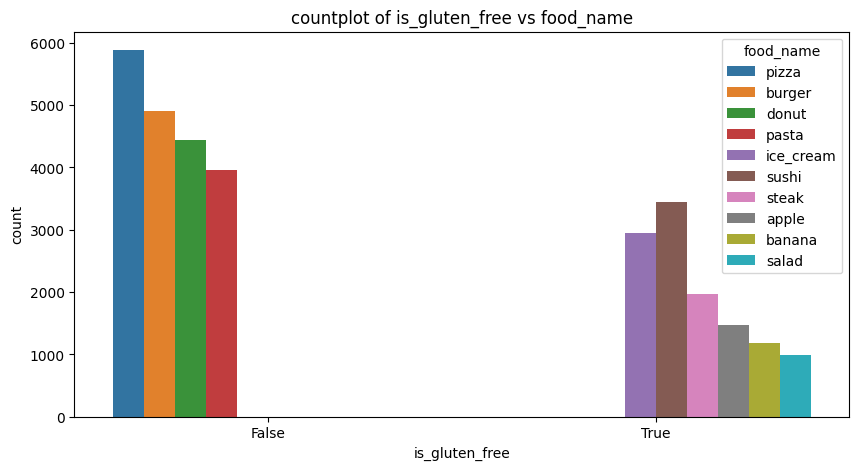

<Figure size 1000x500 with 0 Axes>

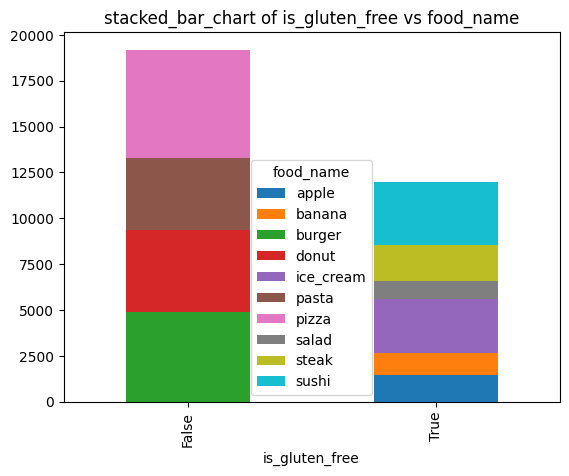

********************


In [82]:
def cat_F_vs_cat_T(nutri_df,feat_col,tar_col):
  ctab = pd.crosstab(nutri_df[feat_col],nutri_df[tar_col])
  print(ctab)

  chi2, p, dof, t = chi2_contingency(ctab)
  alpha = 0.05
  print(f"p value is :{p}")
  if p <= alpha:
    print('Significant Difference (Reject H0)')
  else:
    print('No Difference (Accept H0)')

  #countplot
  plt.figure(figsize=(10,5))
  sns.countplot(data=nutri_df,x=feat_col,hue=tar_col)
  plt.title(f"countplot of {feat_col} vs {tar_col}")
  plt.show()

  #stacked_bar_chart
  plt.figure(figsize=(10,5))
  ctab.plot(kind='bar',stacked=True)
  plt.title(f"stacked_bar_chart of {feat_col} vs {tar_col}")
  plt.show()


for col in cat_columns.columns:
    print(col, ':')
    cat_F_vs_cat_T(nutri_df, col, 'food_name')
    print('*' *20)

In [83]:
# There is a significant association between 'is_vegan ' and 'food_name'.
# There is a significant association between 'is_gluten_free ' and 'food_name'.

In [84]:
cat_columns_selected = cat_columns[['is_vegan','is_gluten_free']]
cat_columns_selected.head()

,is_vegan,is_gluten_free
0,False,False
1,False,True
2,False,False
3,False,True
4,False,False


In [85]:
cat_columns_selected = cat_columns_selected.astype('int')
cat_columns_selected.head()

,is_vegan,is_gluten_free
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [86]:
X_final = pd.concat([Num_columns,cat_columns_selected],axis=1)
X_final.head()

,calories,protein,fat,carbs,sugar,fiber,sodium,cholesterol,glycemic_index,water_content,serving_size,is_vegan,is_gluten_free
0,290.464,14.340,14.153,35.267,4.828,1.291,647.553,24.990,81.576,45.669,197.570,0,0
1,212.627,4.081,11.622,23.219,16.348,0.130,68.572,34.302,69.522,49.854,103.834,0,1
2,330.695,14.327,19.748,29.479,6.251,0.794,663.172,34.817,62.552,40.133,198.989,0,0
3,198.071,9.452,5.476,32.098,2.985,1.710,300.750,28.511,68.689,57.423,135.714,0,1
4,274.496,6.100,16.256,29.757,17.353,1.466,296.315,15.403,70.385,33.170,73.019,0,0


In [87]:
Y.head()

0        pizza
1    ice_cream
2       burger
3        sushi
4        donut
Name: food_name, dtype: object

4. Pipeline Building

4.1 Train - Test Split

In [88]:

X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y,test_size=0.15,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((26499, 13), (4677, 13), (26499,), (4677,))

4.2 pipeline and pre processing transformer

In [89]:
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_test_encoded = le.transform(Y_test)

In [90]:
num_col_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_col_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [91]:
preprocess_steps = ColumnTransformer([
    ('num_transformer', num_col_transformer, Num_columns.columns),
    ('cat_transformer', cat_col_transformer, cat_columns_selected.columns)
])
preprocess_steps

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num_transformer', ...), ('cat_transformer', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and 

5. Model Selection and Evaluation

5.1 Logistic Regression

In [92]:
model = Pipeline(steps=[
    ('preprocess_step', preprocess_steps),
    ('model', LogisticRegression())
])
model

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess_step', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num_transformer', ...), ('cat_transformer', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of th

In [93]:
model.fit(X_train,Y_train_encoded)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess_step', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num_transformer', ...), ('cat_transformer', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of th

In [ ]:
y_pred_train_lr = model.predict(X_train)
y_pred_test_lr = model.predict(X_test)

In [95]:
# Evaluation Metrics

print('Classification Report - Train Data')
print(classification_report(Y_train_encoded, y_pred_train_lr))

print('Classification Report - Test Data')
print(classification_report(Y_test_encoded, y_pred_test_lr))

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       0.99      1.00      1.00       992
           2       0.99      1.00      0.99      4179
           3       1.00      1.00      1.00      3775
           4       1.00      1.00      1.00      2499
           5       1.00      1.00      1.00      3377
           6       1.00      1.00      1.00      5011
           7       1.00      1.00      1.00       828
           8       1.00      1.00      1.00      1677
           9       1.00      1.00      1.00      2912

    accuracy                           1.00     26499
   macro avg       1.00      1.00      1.00     26499
weighted avg       1.00      1.00      1.00     26499

Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       214
           1       0.99      0.98      0.99       187
         

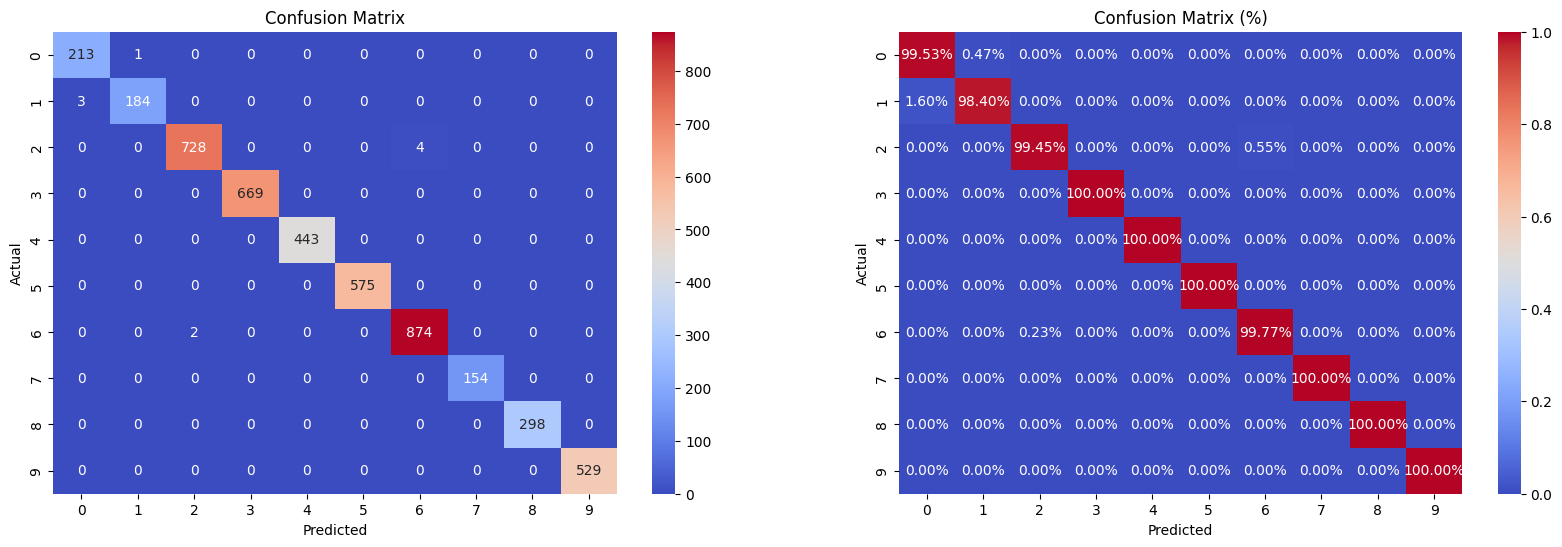

In [96]:
# Confusion Matrix

cm = confusion_matrix(Y_test_encoded, y_pred_test_lr)

cm_percentage = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5.2 Decision Tree Classifier

In [97]:
model = Pipeline(steps=[
    ('preprocess_step', preprocess_steps),
    ('classifier', DecisionTreeClassifier(max_depth=8))
])

# Fitting the model
model.fit(X_train,Y_train_encoded)

# Predictions on Train and Test data
y_pred_train_DT = model.predict(X_train)
y_pred_test_DT = model.predict(X_test)

# Evaluation Metrics

print('Classification Report - Train Data')
print(classification_report(Y_train_encoded, y_pred_train_DT))

print('Classification Report - Test Data')
print(classification_report(Y_test_encoded, y_pred_test_DT))

Classification Report - Train Data
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1249
           1       0.99      0.99      0.99       992
           2       0.99      0.99      0.99      4179
           3       1.00      1.00      1.00      3775
           4       1.00      1.00      1.00      2499
           5       1.00      1.00      1.00      3377
           6       0.99      0.99      0.99      5011
           7       0.98      1.00      0.99       828
           8       1.00      1.00      1.00      1677
           9       1.00      1.00      1.00      2912

    accuracy                           1.00     26499
   macro avg       1.00      1.00      1.00     26499
weighted avg       1.00      1.00      1.00     26499

Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       214
           1       0.96      0.97      0.97       187
         

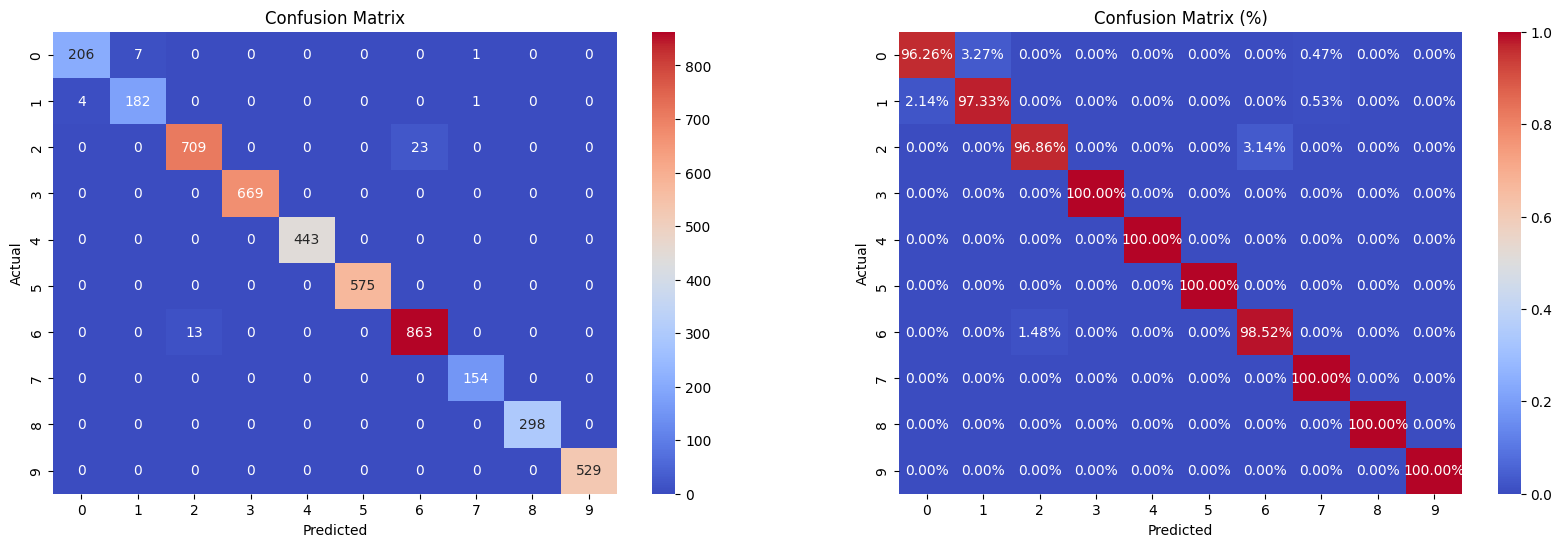

In [98]:
# Confusion Matrix

cm = confusion_matrix(Y_test_encoded, y_pred_test_DT)

cm_percentage = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5.3 Random Forest Classifier

In [99]:
model = Pipeline(steps=[
    ('preprocess_step', preprocess_steps),
    ('RF_classifier', RandomForestClassifier(n_estimators=10,max_depth=8))
])

# Fitting the model
model.fit(X_train,Y_train_encoded)

# Predictions on Train and Test data
y_pred_train_RF = model.predict(X_train)
y_pred_test_RF = model.predict(X_test)

# Evaluation Metrics

print('Classification Report - Train Data')
print(classification_report(Y_train_encoded, y_pred_train_RF))

print('Classification Report - Test Data')
print(classification_report(Y_test_encoded, y_pred_test_RF))

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00       992
           2       1.00      0.99      0.99      4179
           3       1.00      1.00      1.00      3775
           4       1.00      1.00      1.00      2499
           5       1.00      1.00      1.00      3377
           6       0.99      1.00      0.99      5011
           7       1.00      1.00      1.00       828
           8       1.00      1.00      1.00      1677
           9       1.00      1.00      1.00      2912

    accuracy                           1.00     26499
   macro avg       1.00      1.00      1.00     26499
weighted avg       1.00      1.00      1.00     26499

Classification Report - Test Data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       214
           1       0.99      0.99      0.99       187
         

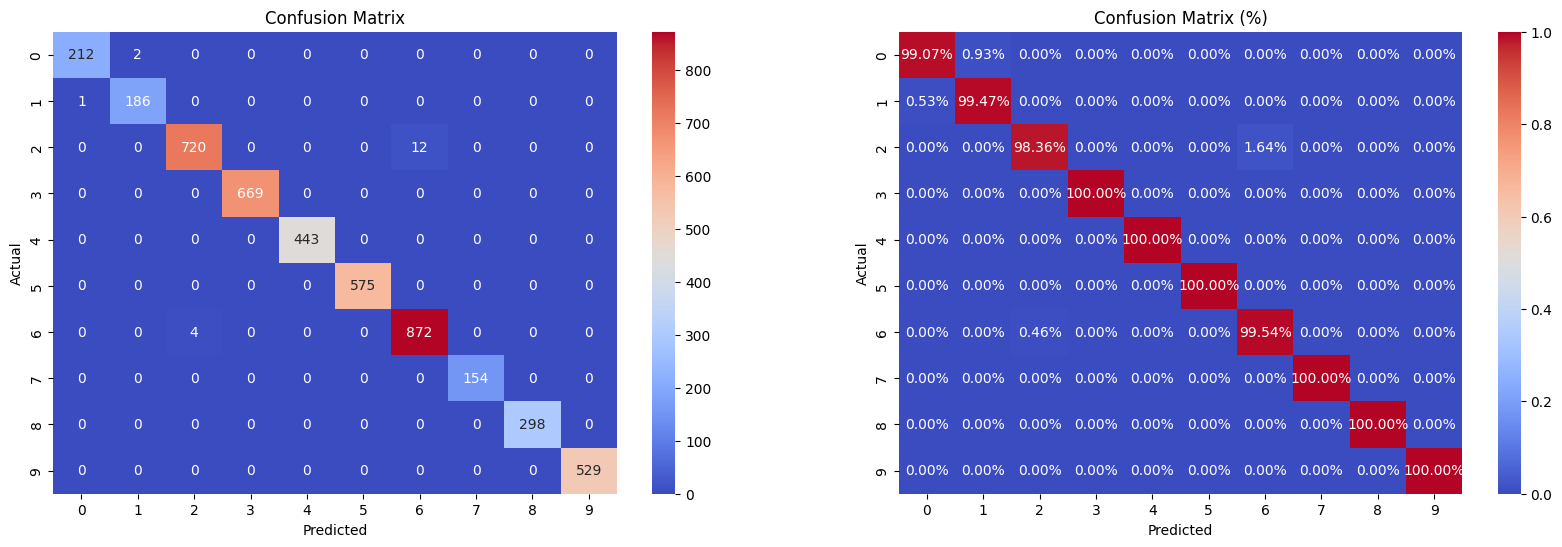

In [100]:
# Confusion Matrix

cm = confusion_matrix(Y_test_encoded, y_pred_test_RF)

cm_percentage = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5.4 K-Nearest Neighbours

In [101]:
model = Pipeline(steps=[
    ('preprocess_step', preprocess_steps),
    ('KNN_classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fitting the model
model.fit(X_train,Y_train_encoded)

# Predictions on Train and Test data
y_pred_train_KNN = model.predict(X_train)
y_pred_test_KNN = model.predict(X_test)

# Evaluation Metrics

print('Classification Report - Train Data')
print(classification_report(Y_train_encoded, y_pred_train_KNN))

print('Classification Report - Test Data')
print(classification_report(Y_test_encoded, y_pred_test_KNN))

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00       992
           2       1.00      0.99      0.99      4179
           3       1.00      1.00      1.00      3775
           4       1.00      1.00      1.00      2499
           5       1.00      1.00      1.00      3377
           6       0.99      1.00      0.99      5011
           7       1.00      1.00      1.00       828
           8       1.00      1.00      1.00      1677
           9       1.00      1.00      1.00      2912

    accuracy                           1.00     26499
   macro avg       1.00      1.00      1.00     26499
weighted avg       1.00      1.00      1.00     26499

Classification Report - Test Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       0.99      0.99      0.99       187
         

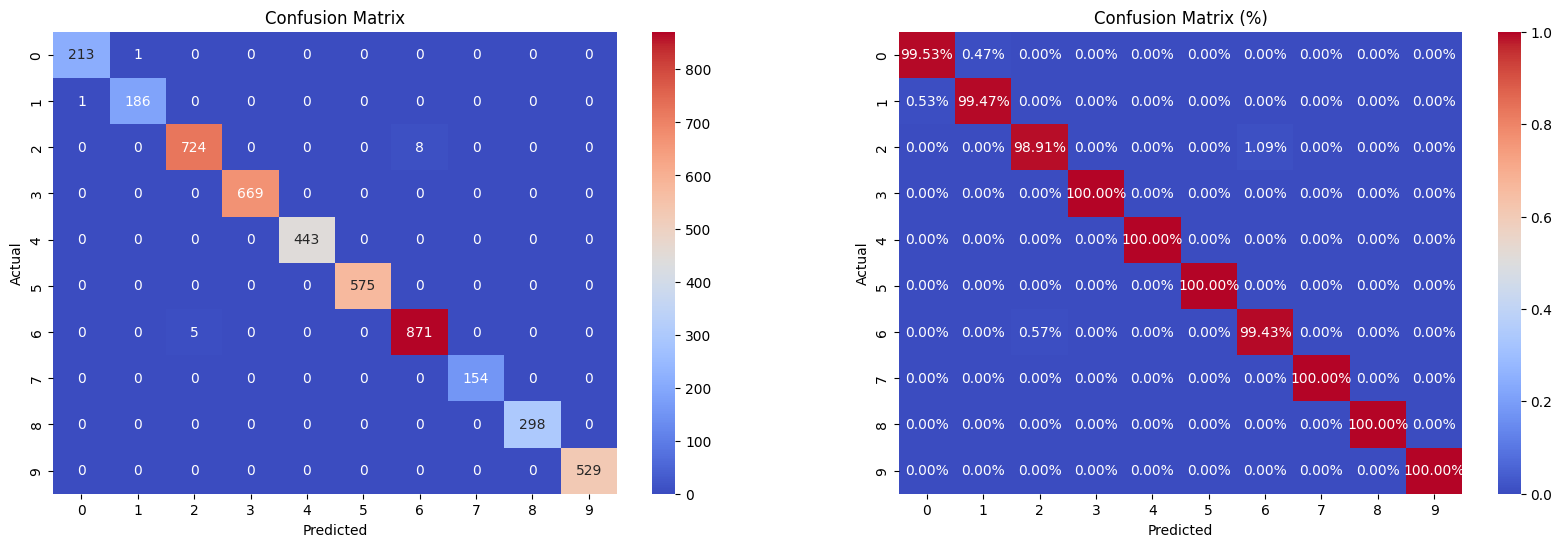

In [102]:
# Confusion Matrix

cm = confusion_matrix(Y_test_encoded, y_pred_test_KNN)

cm_percentage = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5.5 Support Vector Machine

In [114]:
model = Pipeline(steps=[
    ('preprocess_step', preprocess_steps),
    ('SVC_classifier', SVC(C=1, kernel='rbf'))
])

# Fitting the model
model.fit(X_train,Y_train_encoded)

# Predictions on Train and Test data
y_pred_train_SVC = model.predict(X_train)
y_pred_test_SVC = model.predict(X_test)

# Evaluation Metrics

print('Classification Report - Train Data')
print(classification_report(Y_train_encoded, y_pred_train_SVC))

print('Classification Report - Test Data')
print(classification_report(Y_test_encoded, y_pred_test_SVC))

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00       992
           2       1.00      1.00      1.00      4179
           3       1.00      1.00      1.00      3775
           4       1.00      1.00      1.00      2499
           5       1.00      1.00      1.00      3377
           6       1.00      1.00      1.00      5011
           7       1.00      1.00      1.00       828
           8       1.00      1.00      1.00      1677
           9       1.00      1.00      1.00      2912

    accuracy                           1.00     26499
   macro avg       1.00      1.00      1.00     26499
weighted avg       1.00      1.00      1.00     26499

Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       214
           1       0.99      0.99      0.99       187
         

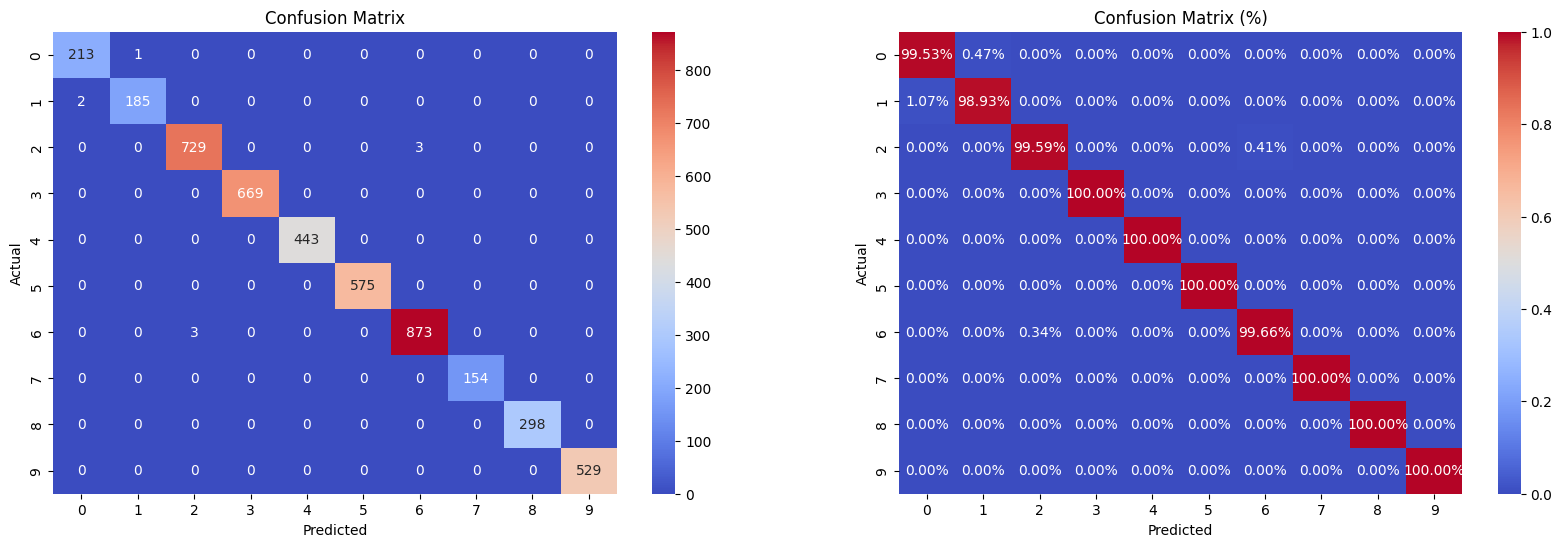

In [112]:
# Confusion Matrix

cm = confusion_matrix(Y_test_encoded, y_pred_test_SVC)

cm_percentage = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5.6 XG Boost

In [108]:
model = Pipeline(steps=[
    ('preprocess_step', preprocess_steps),
    ('xgb_classifier', XGBClassifier(n_estimators=10, max_depth=6))
])

# Fitting the model
model.fit(X_train,Y_train_encoded)

# Predictions on Train and Test data
y_pred_train_xgb = model.predict(X_train)
y_pred_test_xgb = model.predict(X_test)

# Evaluation Metrics

print('Classification Report - Train Data')
print(classification_report(Y_train_encoded, y_pred_train_xgb))

print('Classification Report - Test Data')
print(classification_report(Y_test_encoded, y_pred_test_xgb))

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00       992
           2       1.00      1.00      1.00      4179
           3       1.00      1.00      1.00      3775
           4       1.00      1.00      1.00      2499
           5       1.00      1.00      1.00      3377
           6       1.00      1.00      1.00      5011
           7       1.00      1.00      1.00       828
           8       1.00      1.00      1.00      1677
           9       1.00      1.00      1.00      2912

    accuracy                           1.00     26499
   macro avg       1.00      1.00      1.00     26499
weighted avg       1.00      1.00      1.00     26499

Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       214
           1       0.99      0.98      0.99       187
         

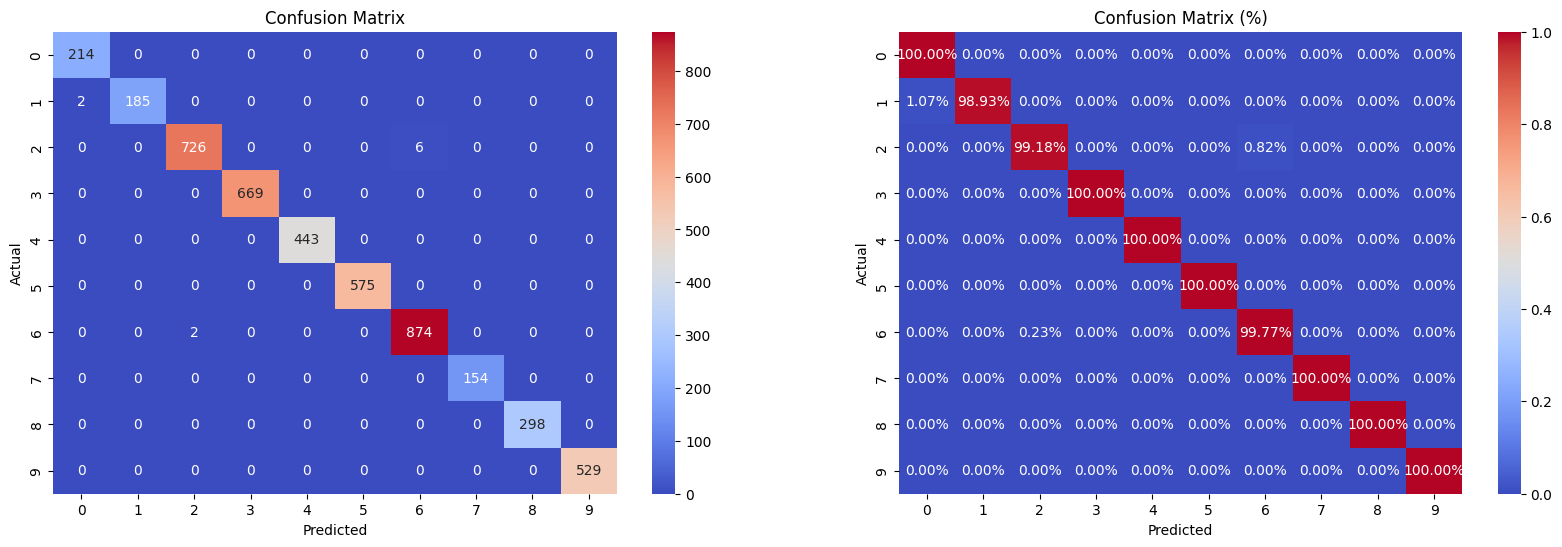

In [106]:
# Confusion Matrix

cm = confusion_matrix(Y_test_encoded, y_pred_test_xgb)

cm_percentage = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

5.7 Gradient Boosting Classifier

In [109]:
model = Pipeline(steps=[
    ('preprocess_step', preprocess_steps),
    ('grad_boost_classifier', GradientBoostingClassifier(n_estimators=10, max_depth=6))
])

# Fitting the model
model.fit(X_train,Y_train_encoded)

# Predictions on Train and Test data
y_pred_train_grad_boost = model.predict(X_train)
y_pred_test_grad_boost = model.predict(X_test)

# Evaluation Metrics

print('Classification Report - Train Data')
print(classification_report(Y_train_encoded, y_pred_train_grad_boost))

print('Classification Report - Test Data')
print(classification_report(Y_test_encoded, y_pred_test_grad_boost))

Classification Report - Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1249
           1       1.00      1.00      1.00       992
           2       1.00      0.99      0.99      4179
           3       1.00      1.00      1.00      3775
           4       1.00      1.00      1.00      2499
           5       1.00      1.00      1.00      3377
           6       0.99      1.00      1.00      5011
           7       1.00      1.00      1.00       828
           8       1.00      1.00      1.00      1677
           9       1.00      1.00      1.00      2912

    accuracy                           1.00     26499
   macro avg       1.00      1.00      1.00     26499
weighted avg       1.00      1.00      1.00     26499

Classification Report - Test Data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       214
           1       0.98      0.97      0.98       187
         

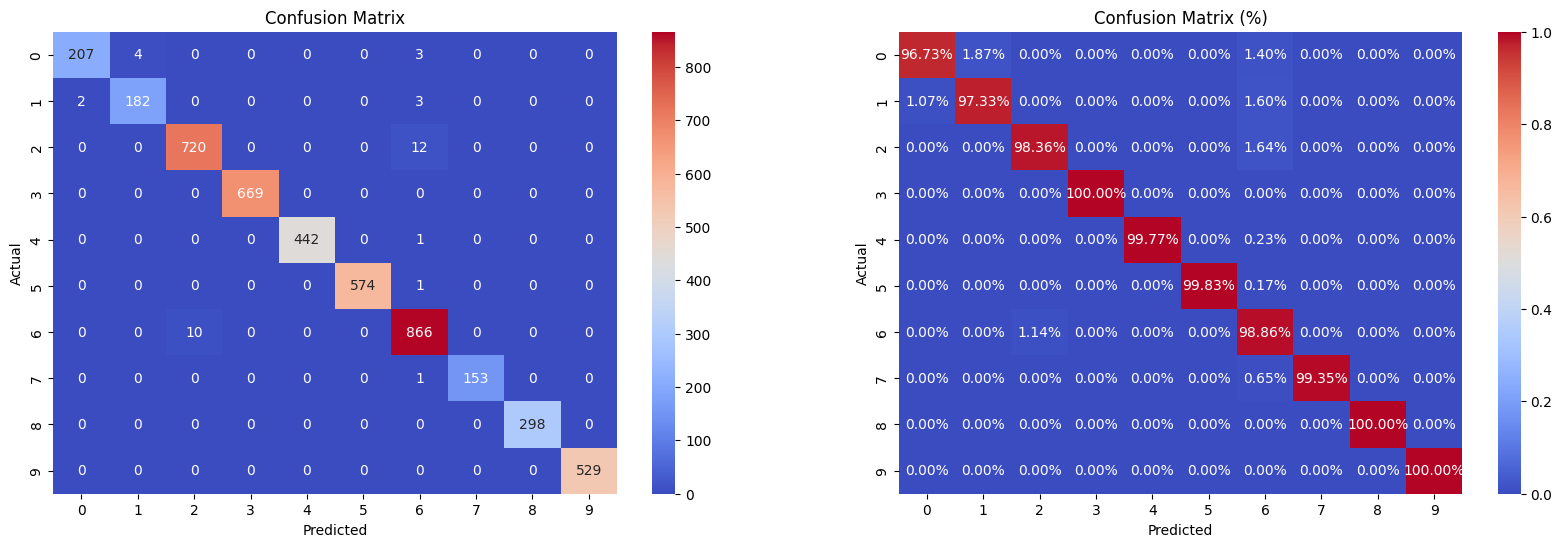

In [110]:
# Confusion Matrix

cm = confusion_matrix(Y_test_encoded, y_pred_test_grad_boost)

cm_percentage = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='coolwarm')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---> INSIGHTS

* DATA INSPECTED, CLEANED AND STANDARDIZED .
* FURTHER EDA IS DONE AND FEATURE SELECTED BASED ON NUMERICAL AND CATEGORICAL .
* MODEL PIPELINE IS BUILT AND FITTED AND PREDICTED FOR EVERY MODEL .
* ALL MODELS ARE EVALUATED AND IT IS FOUND THAT ALL MODELS PERFORMED EQUALLY AND HAS GIVEN ACCURACY SCORE OF 99% .
* OF ALL MODELS TESTED GRADIENT BOOSTING CLASSIFIER PERFORMED WELL FOR ALL TARGET CLASSES
IN BOTH TRAINING AND TESTING .